In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.legend_handler import HandlerTuple

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

In [2]:
# create color patterns
import colors

orange = ["#ffac00"]
darkorange = ["#c46e00"]
blue = ["#0F52BA"]
gold = ["#FFA000"]
green = ["#61a842"]
darkgreen = ["#2c853c"]
red = ["#e85c47"]
brown = ["#98733a"]
purple = ["#cb5fb1"]
qt_red = ["#B22222"]
c0_blue = ["#1f77b4"]
c1_orange = ["#ff7f0e"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        darkorange.append(colors.get_alpha_hex(darkorange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        gold.append(colors.get_alpha_hex(gold[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        darkgreen.append(colors.get_alpha_hex(darkgreen[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))
        brown.append(colors.get_alpha_hex(brown[0],beta[i]))
        purple.append(colors.get_alpha_hex(purple[0],beta[i]))
        qt_red.append(colors.get_alpha_hex(qt_red[0],beta[i]))
        c0_blue.append(colors.get_alpha_hex(c0_blue[0],beta[i]))
        c1_orange.append(colors.get_alpha_hex(c1_orange[0],beta[i]))

In [3]:
### QT and ME data (from QuTip)
data = np.load("../data/two_qubit_redfield_qt.npz")

me_time_list = data['me_time']
qt_time_list = data['qt_time']

state_00_me = data['state_00_pop_me']
state_11_me = data['state_11_pop_me']
state_22_me = data['state_22_pop_me']

qt_state_00_mean = data['state_00_pop_qt_mean']
qt_state_00_lb   = data['state_00_pop_qt_lb']
qt_state_00_ub   = data['state_00_pop_qt_ub']

qt_state_11_mean = data['state_11_pop_qt_mean']
qt_state_11_lb   = data['state_11_pop_qt_lb']
qt_state_11_ub   = data['state_11_pop_qt_ub']

qt_state_22_mean = data['state_22_pop_qt_mean']
qt_state_22_lb   = data['state_22_pop_qt_lb']
qt_state_22_ub   = data['state_22_pop_qt_ub']

qt_trace_mean = data['qt_trace_mean']
qt_trace_lb   = data['qt_trace_lb']
qt_trace_ub   = data['qt_trace_ub']

### QMC data (from OpenQMC, raw data stored in ../data/two_qubit_redfield_qmc_single_shot.jld2)
data_qmc = np.load("../data/two_qubit_redfield_qmc.npz")
qmc_time_list = data_qmc['t_list']
qmc_state_00_pop = data_qmc['state_00_pop_mean']
qmc_state_11_pop = data_qmc['state_11_pop_mean']
qmc_state_22_pop = data_qmc['state_22_pop_mean']
qmc_diag_re      = data_qmc['Nw_diag_re_mean']

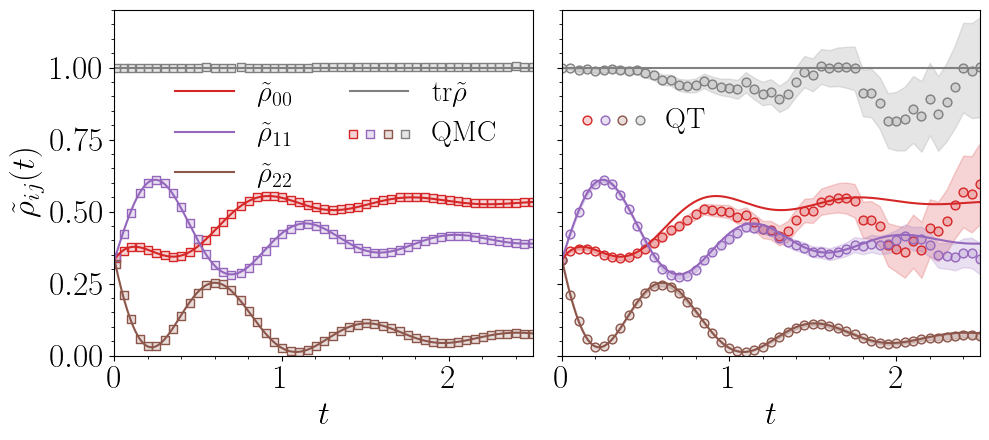

In [4]:
fig, (ax, ax_qt) = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True) 

me_state_00, = ax.plot(me_time_list, state_00_me, color='C3',
         label=r"$\tilde{\rho}_{00}$")
me_state_11, = ax.plot(me_time_list, state_11_me, color='C4',
         label=r"$\tilde{\rho}_{11}$")
me_state_22, = ax.plot(me_time_list, state_22_me, color='C5',
         label=r"$\tilde{\rho}_{22}$")
me_trace, = ax.plot(me_time_list, np.ones_like(me_time_list), color="0.5",
         label=r"$\operatorname{tr} \tilde{\rho}$")

qmc_state_00 = ax.scatter(qmc_time_list, qmc_state_00_pop, 
                    marker='s', edgecolor='C3', facecolor=('C3',0.2), s=40,
                    label='QMC')
qmc_state_11 = ax.scatter(qmc_time_list, qmc_state_11_pop, 
                    marker='s', edgecolor='C4', facecolor=('C4',0.2), s=40,
                    label='QMC')
qmc_state_22 = ax.scatter(qmc_time_list, qmc_state_22_pop, 
                    marker='s', edgecolor='C5', facecolor=('C5',0.2), s=40,
                    label='QMC')
qmc_trace = ax.scatter(qmc_time_list, np.array(qmc_diag_re)/1e6, 
                    marker='s', edgecolor='0.5', facecolor=('0.5',0.2), s=40,
                    label='QMC')

### Now work on QT figure
ax_qt.plot(me_time_list, state_00_me, color='C3',
         label=r"$\tilde{\rho}_{00}$")
ax_qt.plot(me_time_list, state_11_me, color='C4',
         label=r"$\tilde{\rho}_{11}$")
ax_qt.plot(me_time_list, state_22_me, color='C5',
         label=r"$\tilde{\rho}_{22}$")
ax_qt.fill_between(
    qt_time_list,qt_state_00_lb, qt_state_00_ub,
    alpha=0.2, color='C3'
)
ax_qt.fill_between(
    qt_time_list,qt_state_11_lb, qt_state_11_ub,
    alpha=0.2, color='C4'
)
ax_qt.fill_between(
    qt_time_list,qt_state_22_lb, qt_state_22_ub,
    alpha=0.2, color='C5'
)
ax_qt.plot(me_time_list, np.ones_like(me_time_list), color="0.5",
         label=r"$\operatorname{tr} \rho$")
ax_qt.fill_between(
    qt_time_list,qt_trace_lb, qt_trace_ub,
    alpha=0.2, color='0.5'
)

qt_state_00 = ax_qt.scatter(qt_time_list, qt_state_00_mean, 
                    marker='o', edgecolor='C3', facecolor=('C3',0.2), s=40,
                    label='QMC')
qt_state_11 = ax_qt.scatter(qt_time_list, qt_state_11_mean,
                    marker='o', edgecolor='C4', facecolor=('C4',0.2), s=40,
                    label='QMC')
qt_state_22 = ax_qt.scatter(qt_time_list, qt_state_22_mean, 
                    marker='o', edgecolor='C5', facecolor=('C5',0.2), s=40,
                    label='QMC')
qt_state_trace = ax_qt.scatter(qt_time_list, qt_trace_mean, 
                    marker='o', edgecolor='0.5', facecolor=('0.5',0.2), s=40,
                    label='QT')

### axis ###
ax.set_xlabel(r'$t$', fontsize=24)
ax.set_ylabel(r'$\tilde{\rho}_{ij}(t)$', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xlim(0,2.5)
ax.set_ylim(0,1.2)
ax.minorticks_on()


### create legend ###
qmc_legend = (qmc_state_00, qmc_state_11, qmc_state_22, qmc_trace)
qmc_label = [r"$\mathrm{QMC}$"]
me_handles = [me_state_00, me_state_11, me_state_22, me_trace]
me_labels = [r"$\tilde{\rho}_{00}$", r"$\tilde{\rho}_{11}$", r"$\tilde{\rho}_{22}$", r"$\mathrm{tr} \tilde{\rho}$"]
all_handles = me_handles + [qmc_legend]
all_labels = me_labels + qmc_label
ax.legend(all_handles, all_labels, 
         handler_map={tuple: HandlerTuple(ndivide=None)},
         bbox_to_anchor=(0.53, 0.64), frameon = False, ncol=2, fontsize=21,
         loc='center'
        )

ax_qt.set_xlabel(r'$t$', fontsize=24)
ax_qt.tick_params(axis='both', which='major', labelsize=24)
ax_qt.set_xlim(0,2.5)
qt_legend = (qt_state_00, qt_state_11, qt_state_22, qt_state_trace)
qt_label = [r"$\mathrm{QT}$"]
ax_qt.legend([qt_legend], qt_label, 
         handler_map={tuple: HandlerTuple(ndivide=None)},
         bbox_to_anchor=(0.20, 0.68), frameon = False, ncol=2, fontsize=21,
         loc='center'
        )
ax_qt.minorticks_on()

plt.tight_layout()

plt.savefig("../fig/two_qubit_nonMarkov.pdf")

In [5]:
### Off-diagonal data
data_offdiag = np.load("../data/two_qubit_redfield_qt_offdiag.npz")

state_01_me = data_offdiag['state_01_pop_me']
state_02_me = data_offdiag['state_02_pop_me']
state_12_me = data_offdiag['state_12_pop_me']

qt_state_01_mean    = data_offdiag['state_01_pop_qt_mean']
qt_state_01_lb_re   = data_offdiag['state_01_pop_qt_lb_re']
qt_state_01_ub_re   = data_offdiag['state_01_pop_qt_ub_re']
qt_state_01_lb_im   = data_offdiag['state_01_pop_qt_lb_im']
qt_state_01_ub_im   = data_offdiag['state_01_pop_qt_ub_im']

qt_state_02_mean    = data_offdiag['state_02_pop_qt_mean']
qt_state_02_lb_re   = data_offdiag['state_02_pop_qt_lb_re']
qt_state_02_ub_re   = data_offdiag['state_02_pop_qt_ub_re']
qt_state_02_lb_im   = data_offdiag['state_02_pop_qt_lb_im']
qt_state_02_ub_im   = data_offdiag['state_02_pop_qt_ub_im']

qt_state_12_mean    = data_offdiag['state_12_pop_qt_mean']
qt_state_12_lb_re   = data_offdiag['state_12_pop_qt_lb_re']
qt_state_12_ub_re   = data_offdiag['state_12_pop_qt_ub_re']
qt_state_12_lb_im   = data_offdiag['state_12_pop_qt_lb_im']
qt_state_12_ub_im   = data_offdiag['state_12_pop_qt_ub_im']

data_off_diag_qmc = np.load("../data/two_qubit_redfield_qmc_offdiag.npz")
qmc_t_list   = data_off_diag_qmc['t_list']
qmc_state_01 = data_off_diag_qmc['state_01_pop_list']
qmc_state_02 = data_off_diag_qmc['state_02_pop_list']
qmc_state_12 = data_off_diag_qmc['state_12_pop_list']

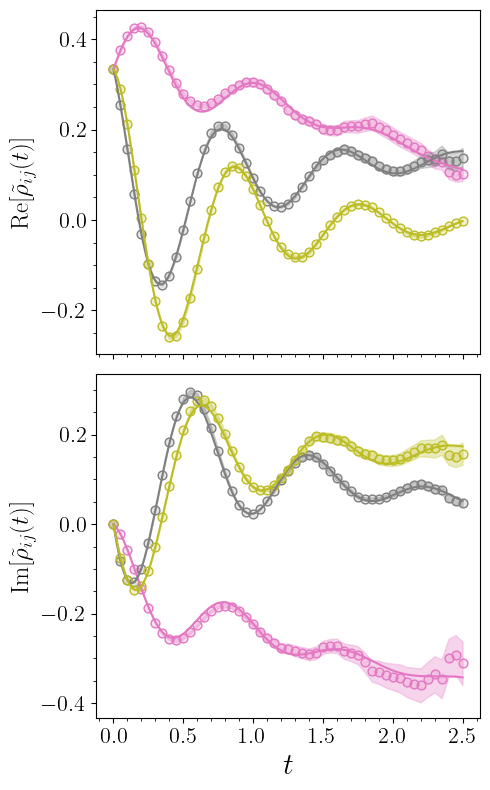

In [6]:
fig, (ax_re, ax_im) = plt.subplots(2, 1, figsize=(5, 8), sharex=True) 

me_state_01, = ax_re.plot(me_time_list, np.real(state_01_me), color='C6',
         label=r"$\tilde{\rho}_{01}$")
me_state_02, = ax_re.plot(me_time_list, np.real(state_02_me), color='C7',
         label=r"$\tilde{\rho}_{02}$")
me_state_12, = ax_re.plot(me_time_list, np.real(state_12_me), color='C8',
         label=r"$\tilde{\rho}_{12}$")

qt_state_01 = ax_re.scatter(qt_time_list, np.real(qt_state_01_mean), 
                    marker='o', edgecolor='C6', facecolor=('C6',0.2), s=40)
ax_re.fill_between(
    qt_time_list,qt_state_01_lb_re, qt_state_01_ub_re,
    alpha=0.3, color='C6'
)

qt_state_02 = ax_re.scatter(qt_time_list, np.real(qt_state_02_mean), 
                    marker='o', edgecolor='C7', facecolor=('C7',0.2), s=40)
ax_re.fill_between(
    qt_time_list,qt_state_02_lb_re, qt_state_02_ub_re,
    alpha=0.3, color='C7'
)

qt_state_12 = ax_re.scatter(qt_time_list, np.real(qt_state_12_mean), 
                    marker='o', edgecolor='C8', facecolor=('C8',0.2), s=40)
ax_re.fill_between(
    qt_time_list,qt_state_12_lb_re, qt_state_12_ub_re,
    alpha=0.3, color='C8'
)

ax_im.plot(me_time_list, np.imag(state_01_me), color='C6',
         label=r"$\tilde{\rho}_{01}$")
ax_im.plot(me_time_list, np.imag(state_02_me), color='C7',
         label=r"$\tilde{\rho}_{02}$")
ax_im.plot(me_time_list, np.imag(state_12_me), color='C8',
         label=r"$\tilde{\rho}_{12}$")

ax_im.scatter(qt_time_list, np.imag(qt_state_01_mean), 
                    marker='o', edgecolor='C6', facecolor=('C6',0.2), s=40)
ax_im.fill_between(
    qt_time_list,qt_state_01_lb_im, qt_state_01_ub_im,
    alpha=0.3, color='C6'
)

ax_im.scatter(qt_time_list, np.imag(qt_state_02_mean), 
                    marker='o', edgecolor='C7', facecolor=('C7',0.2), s=40)
ax_im.fill_between(
    qt_time_list,qt_state_02_lb_im, qt_state_02_ub_im,
    alpha=0.3, color='C7'
)

ax_im.scatter(qt_time_list, np.imag(qt_state_12_mean), 
                    marker='o', edgecolor='C8', facecolor=('C8',0.2), s=40)
ax_im.fill_between(
    qt_time_list,qt_state_12_lb_im, qt_state_12_ub_im,
    alpha=0.3, color='C8'
)

#ax_re.legend(frameon = False, fontsize=18)

### axis ###
ax_im.set_xlabel(r'$t$', fontsize=22)
ax_re.set_ylabel(r'$\mathrm{Re}[\tilde{\rho}_{ij}(t)]$', fontsize=18)
ax_im.set_ylabel(r'$\mathrm{Im}[\tilde{\rho}_{ij}(t)]$', fontsize=18)
ax_im.tick_params(axis='both', which='major', labelsize=16)
ax_re.tick_params(axis='y', which='major', labelsize=16)
ax_re.minorticks_on()
ax_im.minorticks_on()

plt.tight_layout()

plt.savefig("../fig/two_qubit_nonMarkov_off_diag_qt.pdf")

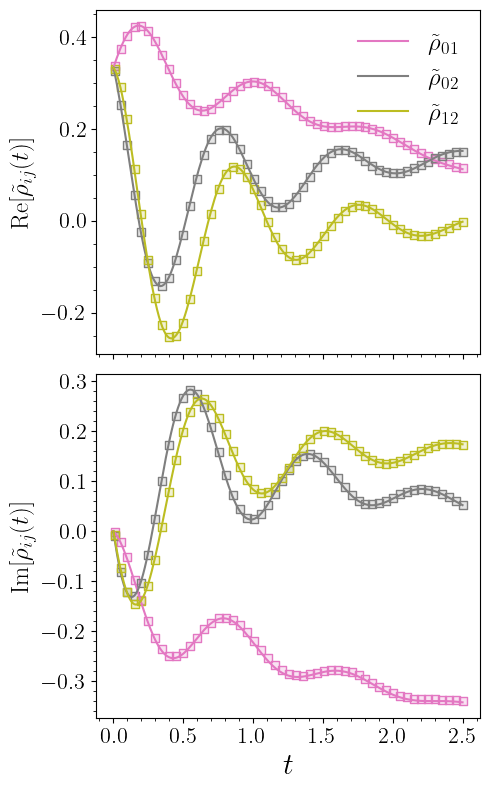

In [7]:
fig, (ax_re, ax_im) = plt.subplots(2, 1, figsize=(5, 8), sharex=True) 

me_state_01, = ax_re.plot(me_time_list, np.real(state_01_me), color='C6',
         label=r"$\tilde{\rho}_{01}$")
me_state_02, = ax_re.plot(me_time_list, np.real(state_02_me), color='C7',
         label=r"$\tilde{\rho}_{02}$")
me_state_12, = ax_re.plot(me_time_list, np.real(state_12_me), color='C8',
         label=r"$\tilde{\rho}_{12}$")

qt_state_01 = ax_re.scatter(qmc_t_list, np.real(qmc_state_01), 
                    marker='s', edgecolor='C6', facecolor=('C6',0.2), s=40)
qt_state_02 = ax_re.scatter(qmc_t_list, np.real(qmc_state_02), 
                    marker='s', edgecolor='C7', facecolor=('C7',0.2), s=40)
qt_state_12 = ax_re.scatter(qmc_t_list, np.real(qmc_state_12), 
                    marker='s', edgecolor='C8', facecolor=('C8',0.2), s=40)

ax_im.plot(me_time_list, np.imag(state_01_me), color='C6',
         label=r"$\tilde{\rho}_{01}$")
ax_im.plot(me_time_list, np.imag(state_02_me), color='C7',
         label=r"$\tilde{\rho}_{12}$")
ax_im.plot(me_time_list, np.imag(state_12_me), color='C8',
         label=r"$\tilde{\rho}_{12}$")

ax_im.scatter(qmc_t_list, np.imag(qmc_state_01), 
                    marker='s', edgecolor='C6', facecolor=('C6',0.2), s=40)
ax_im.scatter(qmc_t_list, np.imag(qmc_state_02), 
                    marker='s', edgecolor='C7', facecolor=('C7',0.2), s=40)

ax_im.scatter(qmc_t_list, np.imag(qmc_state_12), 
                    marker='s', edgecolor='C8', facecolor=('C8',0.2), s=40)

ax_re.legend(frameon = False, fontsize=18)

### axis ###
ax_im.set_xlabel(r'$t$', fontsize=22)
ax_re.set_ylabel(r'$\mathrm{Re}[\tilde{\rho}_{ij}(t)]$', fontsize=18)
ax_im.set_ylabel(r'$\mathrm{Im}[\tilde{\rho}_{ij}(t)]$', fontsize=18)
ax_im.tick_params(axis='both', which='major', labelsize=16)
ax_re.tick_params(axis='y', which='major', labelsize=16)
ax_re.minorticks_on()
ax_im.minorticks_on()

plt.tight_layout()
plt.savefig("../fig/two_qubit_nonMarkov_off_diag_qmc.pdf")